In [124]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout
from sklearn.metrics import accuracy_score


In [105]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    shuffle= True,
    image_size=(256,256),
    batch_size= 32
)
class_names = train_data.class_names
print("class_names are:",class_names)

Found 220 files belonging to 2 classes.
class_names are: ['men', 'women']


In [91]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    validation_split=0.2,   
    subset="validation", 
    shuffle=True,
    seed=123,
    image_size=(256,256),
    batch_size=32
)
class_names_val = train_data.class_names
print("class_names are:",class_names_val)

Found 220 files belonging to 2 classes.
Using 44 files for validation.
class_names are: ['men', 'women']


In [92]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    image_size=(256,256),
    batch_size=32,
    shuffle=False
)
class_names_test = train_data.class_names
print("class_names are:",class_names_test)


Found 80 files belonging to 2 classes.
class_names are: ['men', 'women']


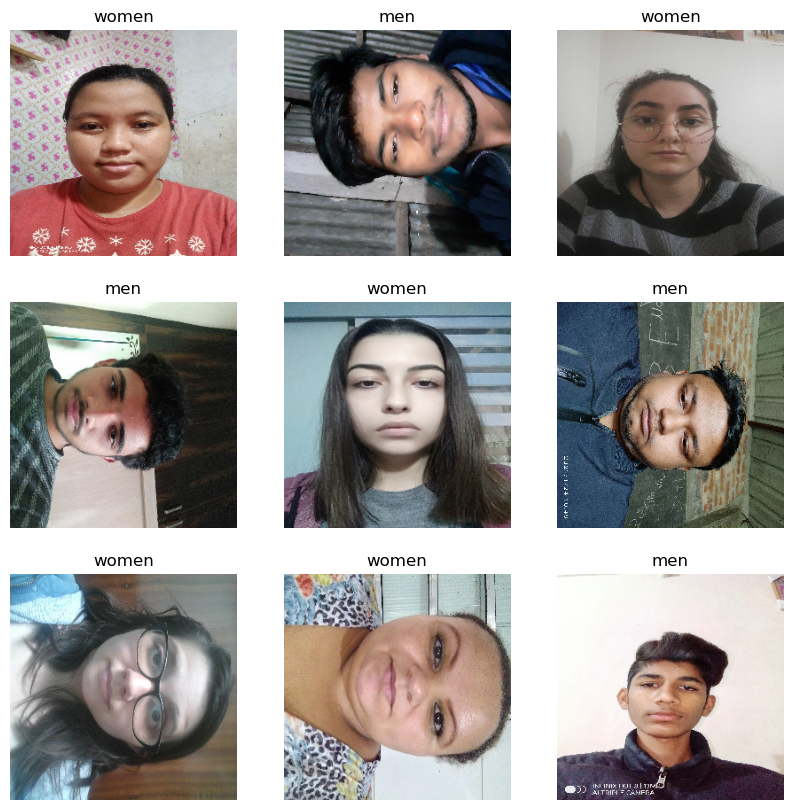

In [93]:
import matplotlib.pyplot as plt
for images, labels in train_data.take(1):
    plt.figure(figsize=(10,10))
    for i in range(9):  
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

In [94]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [95]:
train_data = train_data.map(normalize)
val_data = val_data.map(normalize)
test_data = test_data.map(normalize)

In [96]:
for images, labels in train_data.take(1):
    print("Images batch shape:", images.shape)
    print("Labels batch shape:", labels.shape)

Images batch shape: (32, 256, 256, 3)
Labels batch shape: (32,)


In [106]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [107]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       1,843,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,862,721 (7.11 MB)

 Trainable params: 1,862,721 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [110]:
history = model.fit(train_data,validation_data=val_data,epochs=15)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 560ms/step - accuracy: 0.5682 - loss: 0.6954 - val_accuracy: 0.5682 - val_loss: 0.6929
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 578ms/step - accuracy: 0.5045 - loss: 0.7162 - val_accuracy: 0.5682 - val_loss: 0.6930
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 555ms/step - accuracy: 0.4636 - loss: 0.7116 - val_accuracy: 0.5682 - val_loss: 0.6931
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 557ms/step - accuracy: 0.5045 - loss: 0.7017 - val_accuracy: 0.5682 - val_loss: 0.6931
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 587ms/step - accuracy: 0.5045 - loss: 0.7060 - val_accuracy: 0.4318 - val_loss: 0.6932
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accuracy: 0.4909 - loss: 0.7025 - val_accuracy: 0.4318 - val_loss: 0.6932
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 573ms/step - accuracy: 0.5409 - loss: 0.6922 - val_accuracy: 0.4318 - val_loss: 0.6932
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 583ms/step - accuracy: 0.5136 - loss: 0.6848 - val_accuracy: 0.4318 - val_loss:

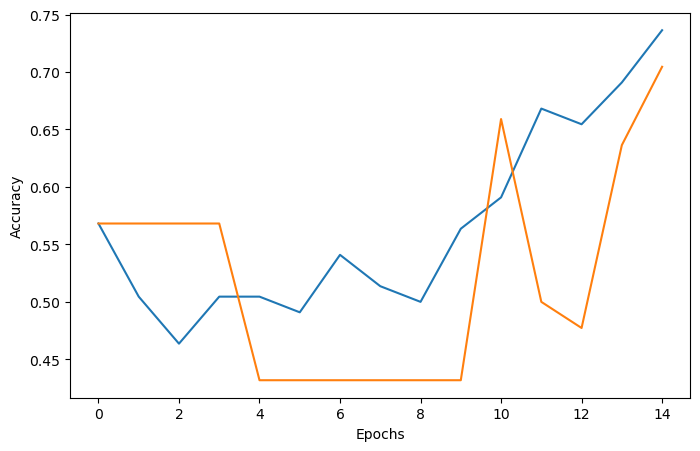

In [111]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [126]:
y_pred_prob = model.predict(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step


In [127]:
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

In [128]:
y_true = np.concatenate([labels.numpy() for _, labels in test_data])


In [130]:
acc = accuracy_score(y_true, y_pred)
print(acc)

0.5375
